<h1><b>MLB TEAM DATA EDA

In [276]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy import stats

Read in our data from Baseball Reference

In [2]:
data = pd.read_csv('TeamData_1990-2018', delimiter='\t')

In [3]:
df = pd.DataFrame(data)
df.head()

,Unnamed: 0,key_0,Tm_x,W,L,W-L%,GB,Abv,Tm_y,#Bat,...,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,Year
0,0,25,Atlanta Braves,65,97,0.401,26.0,ATL,ATL,46,...,0.706,90,2177,101,27,49,31,36,1074,1990
1,1,4,Baltimore Orioles,76,85,0.472,11.5,BAL,BAL,47,...,0.700,99,2002,131,40,72,41,50,1230,1990
2,2,0,Boston Red Sox,88,74,0.543,--,BOS,BOS,43,...,0.739,104,2180,174,28,48,44,59,1233,1990
3,3,10,California Angels,80,82,0.494,23.0,CAL,CAL,43,...,0.720,104,2180,142,28,58,45,41,1202,1990
4,4,17,Chicago Cubs,77,85,0.475,18.0,CHC,CHC,39,...,0.706,87,2194,100,30,61,51,68,1124,1990


In [4]:
df.columns

Index(['Unnamed: 0', 'key_0', 'Tm_x', 'W', 'L', 'W-L%', 'GB', 'Abv', 'Tm_y',
       '#Bat', 'BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB',
       'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB', 'Year'],
      dtype='object')

<h2><b> DATA CLEANING

In [5]:
import missingno as msno
%matplotlib inline
#check for missing values in the df
#msno.matrix(compiled_df.iloc[:,19:])
#msno.matrix(compiled_df.iloc[:,:19])

In [78]:
#reorder columns and drop redundant columns
# df = df[['Tm_x','Abv', 'Year', 'W', 'L', 'W-L%', 'GB', 'BatAge', '#Bat', 'G', 'AB', 'PA', 'R', 'R/G',
#             'H', '2B', '3B', 'HR', 'RBI', 'TB', 'BA', 'BB', 'OBP', 'SLG', 'OPS', 'OPS+', 'SO', 'SB', 'CS',
#             'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB']]

In [79]:
#check for any NaN values
df.isnull().any().sum()

0

In [8]:
df = df.rename(index=str, columns={"Tm_x": "Team", "W-L%": "W/L", '#Bat': 'Num_Hitters', '2B': 'Doubles', '3B': 'Triples', 'OPS+': 'OPS_Plus'})

In [9]:
#create column for hits per game
df['H/G'] = df['H']/df['G']

#create column for extra base hits
df['Extra_Base_Hits'] = df['Doubles']+df['Triples']+df['HR']

#create column for BABIP
df['BABIP'] = (df['H']-df['HR'])/(df['AB'] - df['SO'] - df['HR'] + df['SF'])

In [113]:
#create column for interaction of OBP*SLG
df['OBP_times_SLG'] = df.OBP*df.SLG

In [316]:
df['Age_of_Hitters'] = pd.cut(df.BatAge,4, labels=["Rookies", "Young_Aged", "Avg_Aged", "Vet_Aged"])

In [291]:
#drop rows where year is 1994/1995 due to MLB strike
df = df[df.Year != 1994]
df = df[df.Year != 1995]

<h2><b> VISUALIZATIONS

In [296]:
df[['R', 'OBP', 'SLG', 'LOB', 'SF', 'OBP_times_SLG']].describe()

,R,OBP,SLG,LOB,SF,OBP_times_SLG
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,741.929293,0.328814,0.412691,1140.559343,45.385101,0.136002
std,85.533752,0.014679,0.027965,58.725391,9.001583,0.014341
min,513.000000,0.292000,0.335000,965.000000,24.000000,0.098155
25%,682.750000,0.319000,0.393000,1100.000000,39.000000,0.125909
50%,735.500000,0.328500,0.411000,1140.000000,45.000000,0.134970
75%,797.250000,0.339000,0.432000,1181.000000,51.000000,0.145197
max,1009.000000,0.373000,0.491000,1312.000000,75.000000,0.177144


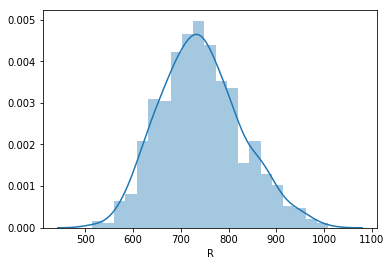

In [297]:
#distributions of runs
sns.distplot(df['R'])

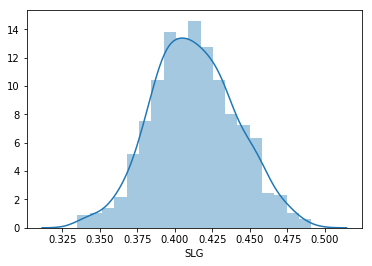

In [298]:
#distribution of SLG
sns.distplot(df['SLG'])

r: 0.8980068452393458


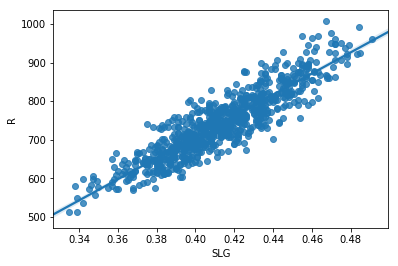

In [299]:
#scatterplot of SLG and R
print('r:', df['SLG'].corr(df['R']))
#sns.scatterplot(df['SLG'], df['R'])
sns.regplot(x=df['SLG'], y=df['R'], data=df)

r: 0.8850805395638963


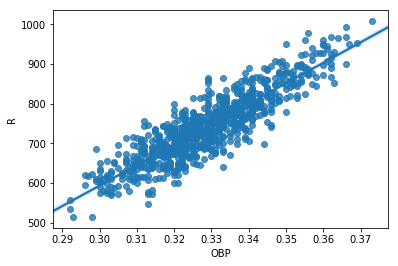

In [300]:
#scatterplot of OBP and R
print('r:', df['OBP'].corr(df['R']))
#sns.scatterplot(df['OBP'], df['R'])
sns.regplot(x=df['OBP'], y=df['R'], data=df)

r: 0.7402891588555475


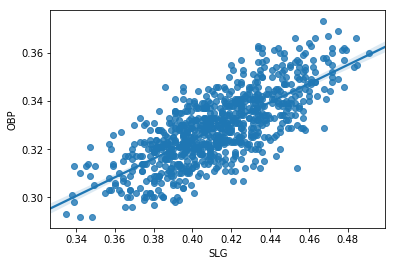

In [301]:
#scatterplot of R and W
print('r:',df['SLG'].corr(df['OBP']))
sns.regplot(x=df['SLG'], y=df['OBP'], data=df)


r: 0.8164089648336568


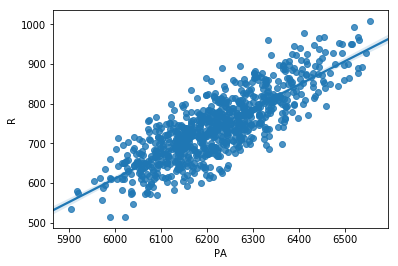

In [302]:
print('r:',df['PA'].corr(df['R']))
sns.regplot(x=df['PA'], y=df['R'], data=df)

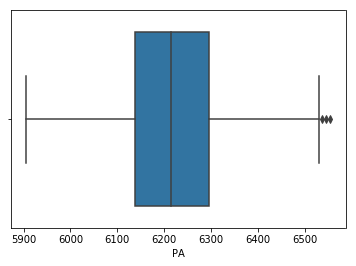

In [303]:
sns.boxplot(x=df['PA'])

In [304]:
print(df['PA'].mean())
print(df['PA'].std())

6220.837121212121
117.89236336964477


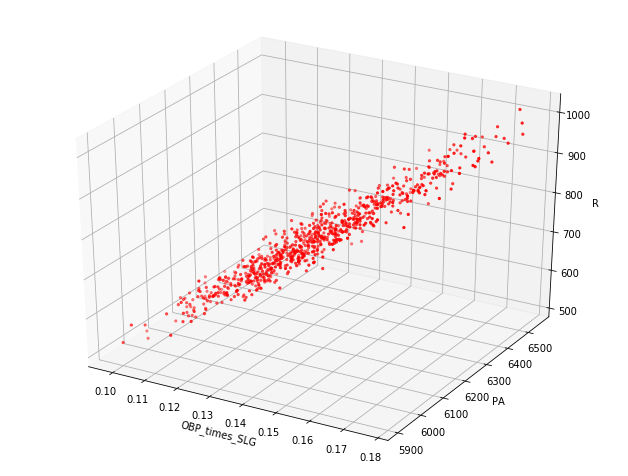

In [305]:
#3D scatter plot of OBP, SLG, and R
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches(11, 8.5)

x = df['OBP_times_SLG']
y = df['PA']
z = df['R']



ax.scatter(x, y, z, c='r', marker='.')


ax.set_xlabel('OBP_times_SLG')
ax.set_ylabel('PA')
ax.set_zlabel('R')

plt.show()

In [335]:
model = ols(formula='R ~ PA + LOB + OBP + OBP_times_SLG', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     4729.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        14:07:40   Log-Likelihood:                -3371.6
No. Observations:                 792   AIC:                             6753.
Df Residuals:                     787   BIC:                             6777.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1876.0267     64.856    -28.926      0.000   -2003.338   -1748.716
PA                0.3723      0.014     26.207      0.000       0.344       0.400
LOB              -0.6533      0.024    -27.783      0.000      -0.699      -0.607
OBP            2080.6982    143.358     14.514      0.000    1799.289    2362.108
OBP_times_SLG  2666.0271    129.127     20.647      0.000    2412.553    2919.501
==============================================================================
Omnibus:                        0.596   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.742   Jarque-Bera (JB):                0.657
Skew:                          -0.063   Prob(JB):                        0.720
Kurtosis:                       2.936   Cond. No.                     1.93e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

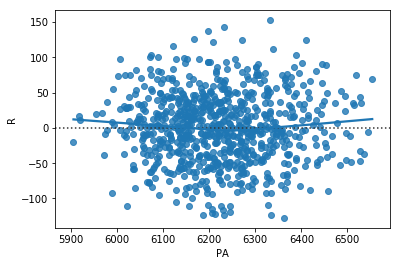

In [308]:
sns.residplot(df['PA'], df['R'], lowess = True)

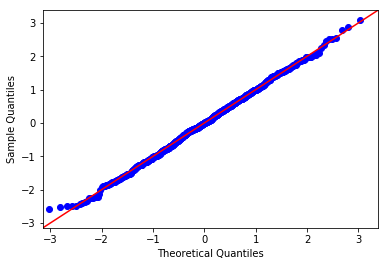

In [309]:
f1 = 'R~PA'
model_2 = ols(formula = f1, data = df).fit()
resid = model_2.resid
fig2 = sm.graphics.qqplot(resid, dist = stats.norm, line = '45', fit=True)

In [310]:
#run Goldfeld Quandt test
#test for heteroskedasticity 
names = ['F Statistic', 'p-value']
test = sms.het_goldfeldquandt(model_2.resid, model_2.model.exog)
list(zip(names,test))

#null hypothesis assumes homoskedacity 

[('F Statistic', 0.9929817347993114), ('p-value', 0.5278456472318436)]

In [311]:
def predict_runs_scored(PA, OBP_times_SLG, OBP, LOB):
    return int((-1876.0267 + (0.3723*PA) + (-0.6533*LOB) + (2080.6982*OBP) + (2666.0271*OBP_times_SLG)))

In [332]:
#predict number of runs for 2001 Chicago Cubs team 
chc_2001_PA = 6219
chc_2001_OBP_times_SLG = 0.14448
chc_2001_OBP = .336
chc_2001_LOB = 1156
chc_2001_actual_runs = 777
chc_2001_predicted_runs = predict_runs_scored(chc_2001_PA, chc_2001_OBP_times_SLG, chc_2001_OBP, chc_2001_LOB)
print('Predicted runs:', chc_2001_predicted_runs)
print('Actual runs:', chc_2001_actual_runs)
print('Difference from actual runs:', chc_2001_actual_runs - chc_2001_predicted_runs)

Predicted runs: 768
Actual runs: 777
Difference from actual runs: 9


In [333]:
9/162

0.05555555555555555

In [269]:
model_3 = ols(formula='R~PA+SLG+OBP', data=df).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     3159.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:26:38   Log-Likelihood:                -3770.1
No. Observations:                 820   AIC:                             7548.
Df Residuals:                     816   BIC:                             7567.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1305.8066     32.258    -40.480      0.000   -1369.125   -1242.488
PA             0.1121      0.006     18.118      0.000       0.100       0.124
SLG         1629.1794     44.926     36.263      0.000    1540.995    1717.364
OBP         2062.8968     91.193     22.621      0.000    1883.896    2241.897
==============================================================================
Omnibus:                        5.096   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                4.968
Skew:                           0.167   Prob(JB):                       0.0834
Kurtosis:                       3.184   Cond. No.                     7.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

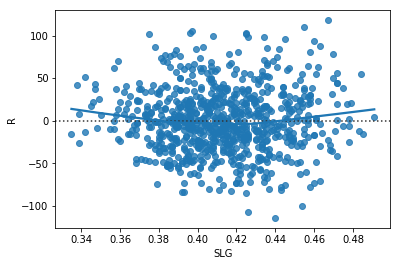

In [327]:
sns.residplot(df['SLG'], df['R'], lowess = True)

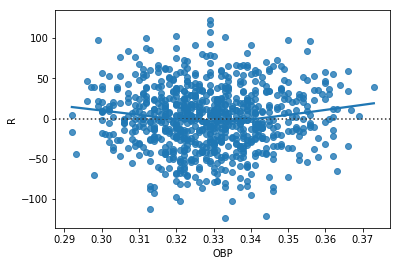

In [325]:
sns.residplot(df['OBP'], df['R'], lowess = True)

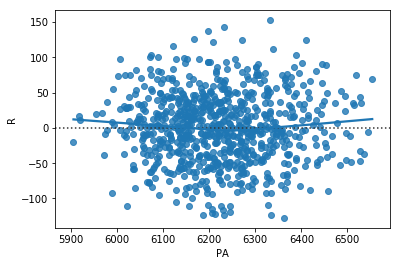

In [328]:
sns.residplot(df['PA'], df['R'], lowess = True)

<b><h1>HYPOTHESIS TEST

The New York Yankees have won the most World Series Championships within the span of 1990-2018 <b>(5)</b>. Let's look into how they match up to the rest of the MLB in terms of runs scored.<br><br>
<b> H0: The mean runs for NYY = the mean runs for of all of MLB<br>
    Ha: The mean runs for NYY > the mean runs for of all of MLB

In [33]:
yankees_sample = test[test['Abv'] == 'NYY']['R'].mean()
mlb_pop_mean = test['R'].mean()
mlb_pop_std = test['R'].std()

print('Yankees Mean:', yankees_sample)
print('MLB Mean:', mlb_pop_mean)
print('MLB Std:', mlb_pop_std)

Yankees Mean: 821.6785714285714
MLB Mean: 740.4414634146342
MLB Std: 85.35173358055611


In [45]:
def get_z_score(sample_, pop_mean, pop_std):
    sample = sample_
    mean = pop_mean
    std = pop_std
    z_score = (sample - mean) / std
    print('Z Score:', z_score)
    if z_score >= 1.96:
        print('Reject null hypothesis')
    elif z_score <= -1.96:
        print('Reject null hypothesis')
    else:
        print('Fail to reject null hypothesis')
    return z_score

In [46]:
get_z_score(yankees_sample, mlb_pop_mean, mlb_pop_std)

Z Score: 0.9517921266035513
Fail to reject null hypothesis


0.9517921266035513

<b>With a z score of .95 we fail to reject the null hypothesis